# TP 7

### Calcular el espectro del Hamiltoniano fluxonium, y sus autovectores dependiendo del campo externo.

El Hamiltoniano que nos compete es el siguiente:
$$
\hat{\cal H} = 4E_C \hat{n}^2 + \frac{E_L}2 \hat{\delta}^2 - E_j \cos(\hat{\delta} + \delta_e)
$$
Como $[\hat n, \hat\delta ] = i$, podemos identificar $\hat\delta \rightarrow \hat p$ y $\hat n \rightarrow \hat x$

In [4]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib
import time, itertools
import os
import tqdm
from ipywidgets import interact, widgets
import itertools

In [2]:
pi=np.pi
dim=300
dstep=2*pi/dim

b=destroy(dim)
phase =  b.dag()*b * 2*pi/dim
d = 2*pi*(/dim-1/2)   #Defino estados |\delta\rangle. m=0 corresponde a delta=-pi y m=dim a delta=pi
def psi(d):
    return basis(dim,m(d))

n = momentum(dim)

In [17]:
def H_0(El,Ej,dext,dim):
    #return El/2 *momentum(dim)**2 - Ej*( (momentum(dim) + dext).cosm())
    return El/2 *momentum(dim)**2 - Ej*( (momentum(dim) + dext))

def H_flx(H_0, Ec, dim):
    return H_0 + 4*Ec*position(dim)**2        

# Espectro

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.63it/s]


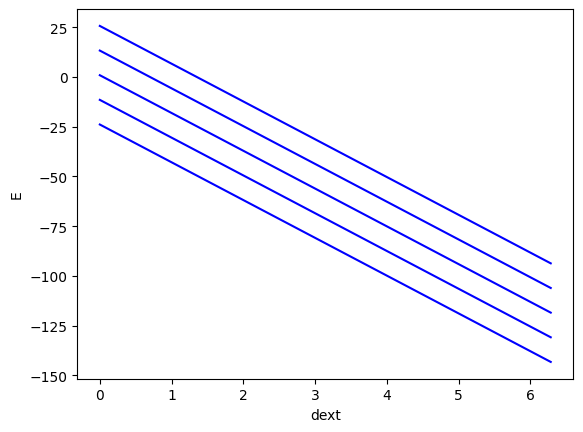

In [18]:
P=3    #periods
dim=P*100
pi = np.pi
dstep=P*2*pi/dim

def d(m):
    return P*2*pi*(m/dim-1/2)

dext_arr=np.linspace(0,2*pi,100)
energies_flx=[]       
energies_0=[]

Ec=3.2
Ej=19
El=6

for dext in tqdm.tqdm(dext_arr):
    H0 = H_0(El,Ej,dext,dim)
    Hflx = H_flx(H0,Ec,dim)
        
    ener_flx,eigen_flx = Hflx.eigenstates()
    energies_flx.append(ener_flx[:5])

    #ener_0,eigen_0 = H0.eigenstates()
    #energies_0.append(sorted(list(set(ener_0)))[:5])
    
energies_flx_arr=np.array(energies_flx)
#energies_0_arr=np.array(energies_0)
    
    
    
plt.figure()
# plt.plot(dext_arr,energies_0_arr,'r.',label='H0')
plt.plot(dext_arr,energies_flx_arr,'b-',label='H_flx')
#plt.ylim(-30,-20)
# axis=np.arange(0,dim,1)
# plt.plot(d(axis), [100+-Ej*np.cos(d(x)+dext) + El/2 * d(x)**2  for x in axis])
# plt.plot(d(axis), 100+El/2 * (d(axis))**2)
plt.xlabel('dext')
plt.ylabel('E')
plt.savefig('espectro.png',dpi=300)
plt.show();

# Energías (dext)

In [33]:
def d(m):
    return 3*2*pi*(m/(dim-1)-1/2)
def energias(dext,Ec=0,El=1,Ej=20):
    
    #H0=H_0(El,Ej,dext)
    #Hflx = H_flx(H0,Ec)
    
    #ener_flx,eigen_flx = Hflx.eigenstates()
    plt.figure()
    
    axis=np.arange(0,dim,1)
    plt.plot(d(axis), [-Ej*np.cos(d(x)+dext) + El/2 * d(x)**2  for x in axis])
    plt.plot(d(axis), El/2 * (d(axis))**2)
    for e in ener_flx[:5]:
        plt.axhline(y=e,color='green')
    plt.savefig('potencial.png',dpi=300)
interact(energias, dext=widgets.FloatSlider(min=0., max=2*pi, step=0.1,value=0),
         Ec=widgets.FloatSlider(min=0., max=10000*dstep**2, step=0.1,value=1),
        Ej=widgets.FloatSlider(min=0., max=100, step=1,value=50),
         El=widgets.FloatSlider(min=0., max=10, step=0.1,value=1));

interactive(children=(FloatSlider(value=0.0, description='dext', max=6.283185307179586), FloatSlider(value=1.0…

# Autoestados (dext)

In [35]:
def energias(dext,Ec=0,El=2,Ej=20):
    colors = ['red', 'green', 'blue', 'orange','magenta']
    iter=itertools.cycle(colors)
    H0=H_0(El,Ej,dext)
    Hflx = H_flx(H0,Ec)
    
    ener_flx,eigen_flx = Hflx.eigenstates()
    
    plt.figure()
    axis=np.arange(0,dim,1)
    plt.plot(d(axis),[(-Ej*np.cos(d(x)+dext) + El/2 * d(x)**2)  for x in axis])
    plt.plot(d(axis),El/2 * (d(axis))**2)
    for i, (e,eigenvector,c) in enumerate(zip(ener_flx[:3],eigen_flx[:3],iter)):
        plt.plot(d(axis), [80+100*(-1)**(int(x))*(np.real(eigenvector.overlap(basis(dim,int(x))) )) for x in axis],'.',color=c)
        plt.plot(d(axis), np.full_like(axis,e),'-',color=c)
    plt.show()

interact(energias, dext=widgets.FloatSlider(min=0., max=2*pi, step=0.1,value=np.pi),
         Ec=widgets.FloatSlider(min=0., max=1000*dstep**2, step=0.1,value=1),
        Ej=widgets.FloatSlider(min=0., max=100, step=1,value=50),
         El=widgets.FloatSlider(min=0., max=1, step=0.001,value=1));

interactive(children=(FloatSlider(value=3.141592653589793, description='dext', max=6.283185307179586), FloatSl…

# Proyección de autoestados sobre $|n\rangle$

In [37]:
pi=np.pi
P=1    #periods
dext_arr=np.linspace(1.8,2.2,300)
dim=P*100

dstep=P*2*pi/dim

def d(m):
    return P*2*pi*(m/(dim-1)-1/2)
def psi(d):
    return basis(dim,m(d))

# def psi_n(n):
#     four=0
#     for x in range(dim):
#         four += np.exp(-1j*x*n*2*np.pi/dim)*basis(dim,x)
#     return (1/np.sqrt(dim))*four
def qft(dim):
    N2 = dim
    phase = 2.0j * np.pi / N2
    arr = np.arange(N2)
    L, M = np.meshgrid(arr, arr)
    L = phase * (L * M)
    L = np.exp(L)
    return Qobj(1.0 / np.sqrt(N2) * L)
four = qft(dim)
def psi_n(d,dim=dim):
    return four*basis(dim,d)

In [43]:
def energias(dext,Ec=1,El=1,Ej=4):
    colors = ['red', 'green', 'blue', 'orange','magenta']
    iter=itertools.cycle(colors)
    H0=H_0(El,Ej,dext)
    Hflx = H_flx(H0,Ec)
    
    ener_flx,eigen_flx = Hflx.eigenstates()
    axis=np.arange(0,dim)
    
    
    plt.figure()
    for e,eigenvector,c in zip(ener_flx[:3],eigen_flx[:3],iter):
        plt.plot(axis, [500*(np.real(eigenvector.overlap(psi_n(x))**2 )) for x in axis],'.',color=c)
        #plt.plot(d(axis), [80+500*(np.real(eigenvector.overlap(basis(dim,int(x))) )**2) for x in axis],'.',color=c)
        #plt.plot(axis, np.full_like(axis,e),'-',color=c)

    plt.figure()
    plt.plot(d(axis),[(-Ej*np.cos(d(x)+dext) + El/2 * d(x)**2)  for x in axis])
    plt.plot(d(axis),El/2 * (d(axis))**2)
    plt.show()


interact(energias, dext=widgets.FloatSlider(min=0., max=2*pi, step=0.1,value=np.pi),
         Ec=widgets.FloatSlider(min=0., max=1*dstep**2, step=0.0001,value=1),
        Ej=widgets.FloatSlider(min=0., max=100, step=1,value=50),
         El=widgets.FloatSlider(min=0., max=1, step=0.001,value=1));

interactive(children=(FloatSlider(value=3.141592653589793, description='dext', max=6.283185307179586), FloatSl…